In [65]:
import numpy as np
#import pandas_profiling
import pandas as pd

In [66]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

In [67]:
df_total = pd.read_csv('df_total1.csv')
df_total

,Unnamed: 0,Animal_ID,Name,DateTime_Intake,Found_Location,Intake_type,Intake_Condition,Animal_Type,Age_upon_Intake,Mix_Breed,...,Sex,neuter/spay,adopted/non-adopted,Days_in_shelter,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group
0,0,a786884,*brock,2019-01-03 04:19:00,2501 magin meadow dr in austin (tx),stray,normal,dog,2.000000,yes,...,male,yes,non-adopted,4.0,small,agreeable,family_dog,frequent,medium_high,hound_group
1,1,a706918,belle,2015-07-05 12:59:00,9409 bluegrass dr in austin (tx),stray,normal,dog,8.000000,no,...,female,yes,adopted,0.0,medium,pleaser,Not_define,medium,medium_low,sporting_group
2,2,a724273,runster,2016-04-14 06:43:00,2818 palomino trail in austin (tx),stray,normal,dog,0.916667,yes,...,male,yes,adopted,6.0,small,independent,apartment_friendly,rare,medium_high,hound_group
3,3,a665644,unknown,2013-10-21 07:59:00,austin (tx),stray,sick,cat,0.076660,yes,...,female,no,non-adopted,0.0,Unknown,Unknown,Not_define,Unknown,not_define,not_define
4,4,a682524,rio,2014-06-29 10:38:00,800 grove blvd in austin (tx),stray,normal,dog,4.000000,no,...,male,yes,adopted,2.0,large,pleaser,guard_dog,medium,high,working_group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109116,110490,a830164,unknown,2021-03-03 02:17:00,travis (tx),owner surrender,normal,dog,0.083333,yes,...,unknown,unknown,non-adopted,0.0,small,agreeable,family_dog,rare,medium_low,toy_group
109117,110491,a829701,pee wee,2021-02-21 02:56:00,16201 biltmore avenue in travis (tx),stray,normal,dog,3.000000,no,...,male,no,adopted,0.0,xsmall,independent,apartment_friendly,very_common,medium_low,toy_group
109118,110492,a765174,carson,2018-01-14 11:31:00,austin (tx),owner surrender,normal,dog,0.083333,yes,...,male,yes,adopted,0.0,xsmall,independent,apartment_friendly,very_common,medium_low,toy_group
109119,110493,a829868,remy,2021-02-25 11:40:00,valdez in austin (tx),stray,normal,dog,1.000000,no,...,male,yes,adopted,5.0,small,agreeable,family_dog,frequent,medium_high,hound_group


# Data Preparation

In [68]:
# csv created this
df_total = df_total.drop('Unnamed: 0',1)

# not conbine well with label coding

df_total = df_total.drop('Animal_ID',1) #@@@@@@@
df_total = df_total.drop('Name',1)
#df_total = df_total.drop('Date of Birth',1)
#df_total = df_total.drop('DateTime_Intake',1)
#df_total = df_total.drop('DateTime_Outcome',1)
df_total = df_total.drop('Location',1)
df_total = df_total.drop('Found_Location',1)    #@@@@@@@@@
#df_total = df_total.drop('Age_upon_Intake_weeks',1)
#df_total = df_total.drop('Age_upon_Outcome_weeks',1)
#df_total = df_total.drop('Days in Shelter',1)

df_total.info()

df_total = df_total.drop('Outcome_Type', 1)
df_total = df_total.drop('Outcome_Subtype', 1)

C:\Users\diedr\AppData\Local\Temp\ipykernel_28932\3061698073.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Unnamed: 0',1)
C:\Users\diedr\AppData\Local\Temp\ipykernel_28932\3061698073.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Animal_ID',1) #@@@@@@@
C:\Users\diedr\AppData\Local\Temp\ipykernel_28932\3061698073.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Name',1)
C:\Users\diedr\AppData\Local\Temp\ipykernel_28932\3061698073.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Location',1)
C:\Users\diedr\AppData\Local\Te

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109121 entries, 0 to 109120
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   DateTime_Intake       109121 non-null  object 
 1   Intake_type           109121 non-null  object 
 2   Intake_Condition      109121 non-null  object 
 3   Animal_Type           109121 non-null  object 
 4   Age_upon_Intake       109121 non-null  float64
 5   Mix_Breed             109121 non-null  object 
 6   Primary_Breed         109121 non-null  object 
 7   Secondary_Breed       109121 non-null  object 
 8   Main_Color            109121 non-null  object 
 9   Secondary_Color       109121 non-null  object 
 10  DateTime_Outcome      109121 non-null  object 
 11  Date of Birth         109121 non-null  object 
 12  Outcome_Type          109121 non-null  object 
 13  Outcome_Subtype       109121 non-null  object 
 14  Age_upon_Outcome      109121 non-null  float64
 15  

C:\Users\diedr\AppData\Local\Temp\ipykernel_28932\3061698073.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Outcome_Type', 1)
C:\Users\diedr\AppData\Local\Temp\ipykernel_28932\3061698073.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('Outcome_Subtype', 1)


In [69]:
cols_num = ['DateTime_Intake','Age_upon_Intake','DateTime_Outcome','Age_upon_Outcome','Date of Birth','Days_in_shelter']
cols_cat = ['Intake_type','Intake_Condition','Mix_Breed','Primary_Breed','Secondary_Breed','Main_Color','Secondary_Color','Sex','neuter/spay','Breed_size','Trainability','Breed_characteristic','Barking_level','activity_level','adopted/non-adopted','breed_group','Animal_Type']
df_total[cols_cat] = df_total[cols_cat].astype('category')
col2 = ['DateTime_Intake','DateTime_Outcome','Date of Birth']
df_total[col2] = df_total[col2].astype('datetime64[ns]')
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109121 entries, 0 to 109120
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   DateTime_Intake       109121 non-null  datetime64[ns]
 1   Intake_type           109121 non-null  category      
 2   Intake_Condition      109121 non-null  category      
 3   Animal_Type           109121 non-null  category      
 4   Age_upon_Intake       109121 non-null  float64       
 5   Mix_Breed             109121 non-null  category      
 6   Primary_Breed         109121 non-null  category      
 7   Secondary_Breed       109121 non-null  category      
 8   Main_Color            109121 non-null  category      
 9   Secondary_Color       109121 non-null  category      
 10  DateTime_Outcome      109121 non-null  datetime64[ns]
 11  Date of Birth         109121 non-null  datetime64[ns]
 12  Age_upon_Outcome      109121 non-null  float64       
 13 

df_total = df_total.drop('Animal_ID',1)
df_total = df_total.drop('Name',1)
df_total = df_total.drop('Location',1)
df_total = df_total.drop('Found_Location',1)
# Cause multicollinearity or it become irrelevant
df_total = df_total.drop('Outcome_Subtype',1)   #same info in outcome  & multicollinearity
df_total = df_total.drop('Animal_Type',1)   # only dogs

df_total = df_total.drop('adopted/non-adopted',1)

In [70]:
# adopted variable comes from outcome type (group in two)
#df_total = df_total.drop('Outcome_Type', axis = 1)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_en= df_total.iloc[cols].values
X_en = labelencoder.fit_transform(X_en)

df_total['adopted/non-adopted'].unique()

# number seperation

In [71]:
df_num = df_total.drop(cols_cat,axis=1)
#df_num = df_num.drop('DateTime_Intake', axis=1)
#df_num = df_num.drop('DateTime_Outcome',axis=1)
df_num

,DateTime_Intake,Age_upon_Intake,DateTime_Outcome,Date of Birth,Age_upon_Outcome,Days_in_shelter
0,2019-01-03 04:19:00,2.000000,2019-01-08 03:11:00,2017-01-03,2.00,4.0
1,2015-07-05 12:59:00,8.000000,2015-07-05 03:13:00,2007-07-05,8.00,0.0
2,2016-04-14 06:43:00,0.916667,2016-04-21 05:17:00,2015-04-17,1.00,6.0
3,2013-10-21 07:59:00,0.076660,2013-10-21 11:39:00,2013-09-21,0.08,0.0
4,2014-06-29 10:38:00,4.000000,2014-07-02 02:16:00,2010-06-29,4.00,2.0
...,...,...,...,...,...,...
109116,2021-03-03 02:17:00,0.083333,2021-03-03 02:28:00,2021-01-19,0.08,0.0
109117,2021-02-21 02:56:00,3.000000,2021-02-21 05:28:00,2017-09-21,3.00,0.0
109118,2018-01-14 11:31:00,0.083333,2018-01-15 05:12:00,2017-11-14,0.17,0.0
109119,2021-02-25 11:40:00,1.000000,2021-03-03 03:47:00,2020-02-25,1.00,5.0


In [72]:
df_total = df_total.drop(cols_num, axis=1)

# Label Encoder

In [73]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
for i in df_total.columns:
    df_total[i] = labelencoder.fit_transform(df_total[i])
df_total

,Intake_type,Intake_Condition,Animal_Type,Mix_Breed,Primary_Breed,Secondary_Breed,Main_Color,Secondary_Color,Sex,neuter/spay,adopted/non-adopted,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group
0,4,5,2,1,35,126,55,37,1,2,1,3,1,2,1,2,1
1,4,5,2,0,131,126,56,34,0,2,0,2,4,0,3,3,5
2,4,5,2,1,32,126,46,51,1,2,0,3,3,1,4,2,1
3,4,9,1,1,119,126,21,37,0,0,1,0,0,0,0,4,3
4,4,5,2,0,116,16,51,29,1,2,0,1,4,3,3,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109116,2,5,2,1,266,126,2,51,2,1,1,3,1,2,4,3,8
109117,4,5,2,0,89,126,15,37,1,0,0,5,3,1,5,3,8
109118,2,5,2,1,89,126,51,51,1,2,0,5,3,1,5,3,8
109119,4,5,2,0,35,109,55,37,1,2,0,3,1,2,1,2,1


df_total.drop('adopted/non-adopted', axis=1)

In [74]:
x = df_total.drop('adopted/non-adopted', 1)
y = df_total['adopted/non-adopted']
x.head()

C:\Users\diedr\AppData\Local\Temp\ipykernel_28932\4183125591.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df_total.drop('adopted/non-adopted', 1)


,Intake_type,Intake_Condition,Animal_Type,Mix_Breed,Primary_Breed,Secondary_Breed,Main_Color,Secondary_Color,Sex,neuter/spay,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group
0,4,5,2,1,35,126,55,37,1,2,3,1,2,1,2,1
1,4,5,2,0,131,126,56,34,0,2,2,4,0,3,3,5
2,4,5,2,1,32,126,46,51,1,2,3,3,1,4,2,1
3,4,9,1,1,119,126,21,37,0,0,0,0,0,0,4,3
4,4,5,2,0,116,16,51,29,1,2,1,4,3,3,0,9


Applying step 1 (filter method)

# change the name so it fix in the next code
import copy
df_total['Outcome_Type'] = copy.deepcopy(df_total["Outcome Type"])

In [75]:
# change the name so it fix in the next code
import copy
df_total['adopted'] = copy.deepcopy(df_total["adopted/non-adopted"])
df_total = df_total.drop('adopted/non-adopted', 1)

C:\Users\diedr\AppData\Local\Temp\ipykernel_28932\3450325865.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_total = df_total.drop('adopted/non-adopted', 1)


In [76]:
importances = df_total.drop('adopted', axis=1).apply(lambda x: x.corr(df_total.adopted))
indices = np.argsort(importances)
print(importances[indices])

neuter/spay            -0.550374
Barking_level          -0.262396
Trainability           -0.245777
Breed_characteristic   -0.204422
Breed_size             -0.200529
breed_group            -0.111479
Primary_Breed          -0.065110
Main_Color             -0.044790
Secondary_Color        -0.026816
Mix_Breed               0.014245
Animal_Type             0.051655
Secondary_Breed         0.061428
Intake_Condition        0.099577
Intake_type             0.135955
activity_level          0.233348
Sex                     0.235755
dtype: float64


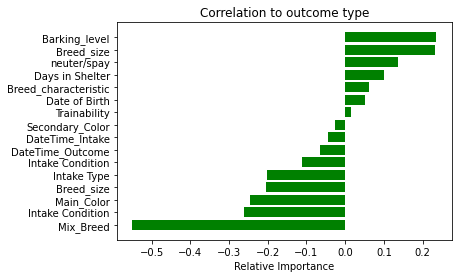

In [77]:
names=['neuter/spay','Days in Shelter','Date of Birth','Trainability','DateTime_Outcome','Breed_characteristic', 'DateTime_Intake','Secondary_Color','Barking_level','Mix_Breed','Intake Type','Main_Color','Breed_size','Intake Condition','Breed_size','Intake Condition','Secondary_Breed','activity_level','Primary_Breed','Sex','breed_group','Age_upon_Outcome_weeks','Age_upon_Intake_weeks']
plt.title('Correlation to outcome type')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [78]:
for i in range(0, len(indices)):
    if np.abs(importances[i])>0.1:
        print(names[i])

neuter/spay
Barking_level
Mix_Breed
Intake Type
Main_Color
Breed_size
Intake Condition
Breed_size
Intake Condition


# step 2

In [79]:
for i in range(0,len(x.columns)):
    for j in  range(0,len(x.columns)):
        if i!=j:
            corr_1=np.abs(x[x.columns[i]].corr(x[x.columns[j]]))
            if corr_1 <0.3:
                print( x.columns[i] , " is not correlated  with ", x.columns[j])
            elif corr_1>0.75:
                print( x.columns[i] , " is highly  correlated  with ", x.columns[j])

Intake_type  is not correlated  with  Intake_Condition
Intake_type  is not correlated  with  Animal_Type
Intake_type  is not correlated  with  Mix_Breed
Intake_type  is not correlated  with  Primary_Breed
Intake_type  is not correlated  with  Secondary_Breed
Intake_type  is not correlated  with  Main_Color
Intake_type  is not correlated  with  Secondary_Color
Intake_type  is not correlated  with  Sex
Intake_type  is not correlated  with  neuter/spay
Intake_type  is not correlated  with  Breed_size
Intake_type  is not correlated  with  Trainability
Intake_type  is not correlated  with  Breed_characteristic
Intake_type  is not correlated  with  Barking_level
Intake_type  is not correlated  with  activity_level
Intake_type  is not correlated  with  breed_group
Intake_Condition  is not correlated  with  Intake_type
Intake_Condition  is not correlated  with  Animal_Type
Intake_Condition  is not correlated  with  Mix_Breed
Intake_Condition  is not correlated  with  Primary_Breed
Intake_Condi

# The variables that are higly correlated with eachother

DateTime_Intake  is highly  correlated  with  DateTime_Outcome

Age_upon_Intake_weeks  is highly  correlated  with  Age_upon_Outcome_week

DateTime_Outcome  is highly  correlated  with  DateTime_Intakes

Age_upon_Outcome_weeks  is highly  correlated  with  Age_upon_Intake_weeks

# drop the highly correlated

x.drop(['DateTime_Intake','DateTime_Outcome','Age_upon_Outcome_weeks','Age_upon_Intake_weeks'], axis = 1)

# adopted variable comes from outcome type (group in two)
x.drop('Outcome Type', axis = 1)

# adopted variable comes from outcome type (group in two)
x.drop('adopted/non-adopted', axis = 1)

In [80]:
mi = mutual_info_regression(x, y)

<AxesSubplot:>

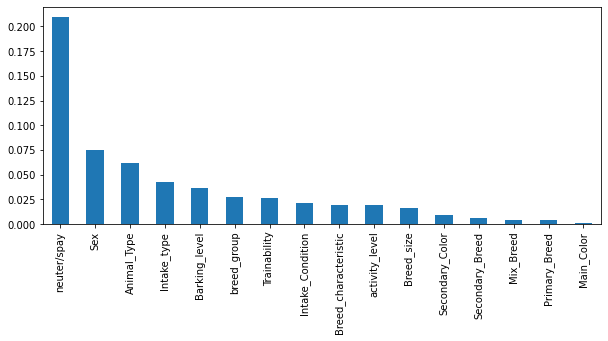

In [81]:
mi = pd.Series(mi)
mi.index = x.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))